In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'AXISBANK.NS', 'KOTAKBANK.NS']
data = yf.download(tickers, start = '2015-01-01', end = '2023-01-01')['Adj Close']
data = data.dropna()

[*********************100%%**********************]  4 of 4 completed


In [3]:
returns = data.pct_change().dropna()

In [4]:
correlation_matrix = returns.corr()
print(correlation_matrix)

              AXISBANK.NS  HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS
AXISBANK.NS      1.000000     0.483820      0.672922      0.454863
HDFCBANK.NS      0.483820     1.000000      0.526848      0.621023
ICICIBANK.NS     0.672922     0.526848      1.000000      0.444098
KOTAKBANK.NS     0.454863     0.621023      0.444098      1.000000


In [16]:
def find_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []

    for i in range(n):
        for j in range(i + 1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            score, pvalue, _ = coint(S1, S2)
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs


In [17]:
score_matrix, pvalue_matrix, pairs = find_pairs(data)
print(pairs)

[('HDFCBANK.NS', 'KOTAKBANK.NS')]


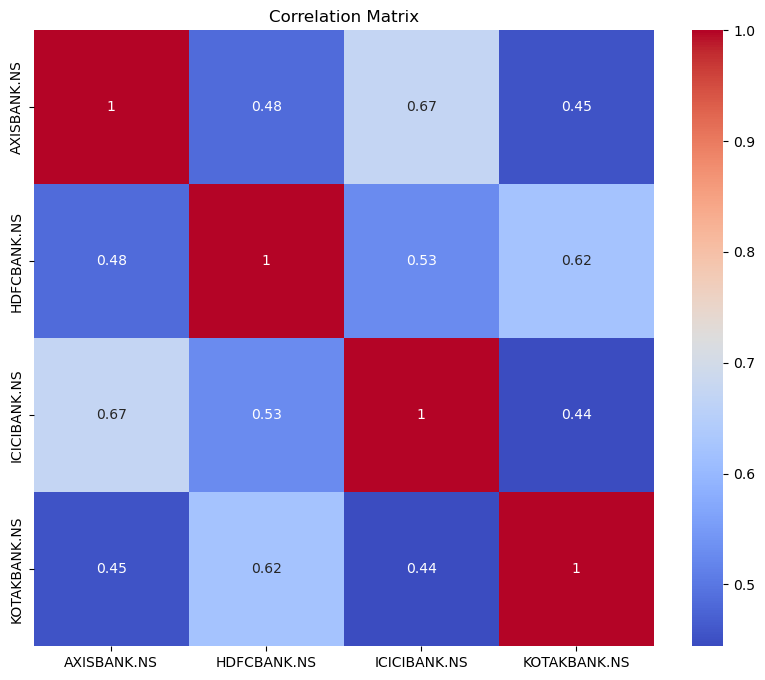

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

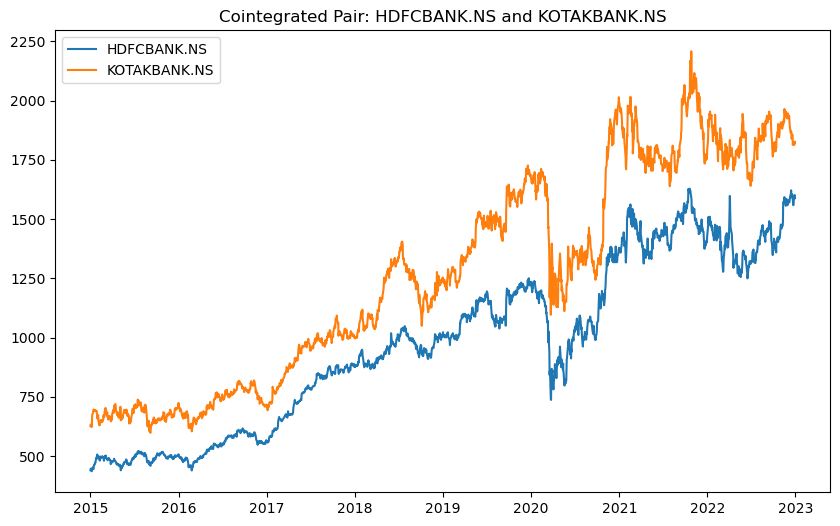

In [19]:
for pair in pairs:
    S1 = data[pair[0]]
    S2 = data[pair[1]]
    plt.figure(figsize=(10, 6))
    plt.plot(S1, label=pair[0])
    plt.plot(S2, label=pair[1])
    plt.legend()
    plt.title(f'Cointegrated Pair: {pair[0]} and {pair[1]}')
    plt.show()

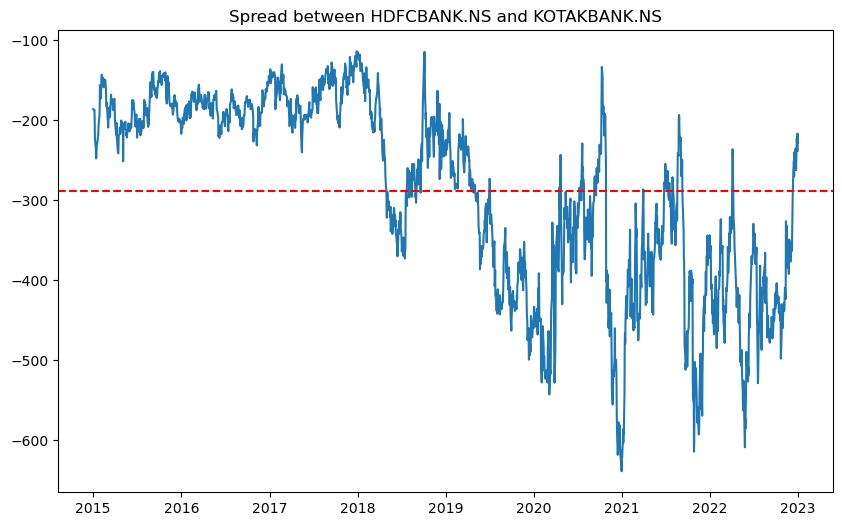

In [20]:
for pair in pairs:
    S1 = data[pair[0]]
    S2 = data[pair[1]]
    spread = S1 - S2
    plt.figure(figsize=(10, 6))
    plt.plot(spread)
    plt.axhline(spread.mean(), color='red', linestyle='--')
    plt.title(f'Spread between {pair[0]} and {pair[1]}')
    plt.show()